In [1]:
# Import all libraries and packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
#Import csv file
mdf = pd.read_csv('/Users/robertpatton/Desktop/D206 /medical_raw_data.csv')

In [3]:
#Examine data types
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

In [4]:
#look for duplicated values
mdf.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [5]:
#confirm exact number of duplicates
mdf.duplicated().value_counts()

False    10000
dtype: int64

In [6]:
#remove unnamed column
mdf=mdf.drop(mdf.columns[[0]], axis=1)

In [7]:
#look for missing values
mdf.isnull().sum()

CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
Anxiety                984
A

array([[<Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Initial_days'}>]], dtype=object)

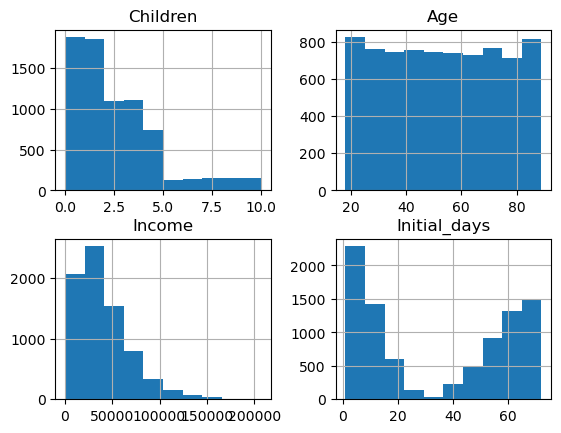

In [9]:
#We have missing values in Children, Age, Income, Soft_drink, Overweight, Anxiety, and Initial_days

#Examine distribution of missing values in quantitative data types
mdf[['Children','Age','Income','Initial_days']].hist()

In [10]:
#perform imputation for missing values on quantitive data types using mean and median
mdf['Children'].fillna(mdf['Children'].median(), inplace = True)
mdf['Age'].fillna(mdf['Age'].mean(), inplace = True)
mdf['Income'].fillna(mdf['Income'].median(), inplace = True)
mdf['Initial_days'].fillna(mdf['Initial_days'].median(), inplace = True)

In [11]:
#verify missing values for quantitative values are filled after imputation
mdf.isnull().sum()

CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children                 0
Age                      0
Education                0
Employment               0
Income                   0
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
Anxiety                984
A

array([[<Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Initial_days'}>]], dtype=object)

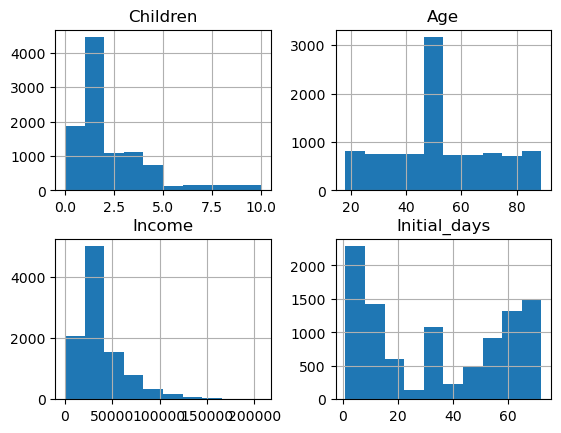

In [12]:
#verify distribution of quantitative variables after imputation
mdf[['Children','Age','Income','Initial_days']].hist()

In [13]:
#perform imputation on missing values for qualitative variables using mode

mdf['Soft_drink']= mdf['Soft_drink'].fillna(mdf['Soft_drink'].mode()[0])
mdf['Overweight']= mdf['Overweight'].fillna(mdf['Overweight'].mode()[0])
mdf['Anxiety']=mdf['Anxiety'].fillna(mdf['Anxiety'].mode()[0])

In [14]:
#replace 'Overweight' column values to match other yes/no types
mdf['Overweight'].replace({0: "No", 1: "Yes"}, inplace= True)

In [15]:
#confirm replace values for 'Overweight'
mdf.Overweight.unique()

array(['No', 'Yes'], dtype=object)

In [16]:
#replace 'Anxiety' column values to match other yes/no types
mdf['Anxiety'].replace({0:"No", 1: "Yes"}, inplace= True)

In [17]:
#confrim replace values for 'Anxiety'
mdf.Anxiety.unique()

array(['Yes', 'No'], dtype=object)

In [18]:
#verify missing values for qualitative variables were imputed
mdf.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
Timezone              0
Job                   0
Children              0
Age                   0
Education             0
Employment            0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
VitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days    

In [19]:
#find all numerical values
mdf_num_data=mdf.select_dtypes(include=[np.number])
mdf_num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Zip                 10000 non-null  int64  
 2   Lat                 10000 non-null  float64
 3   Lng                 10000 non-null  float64
 4   Population          10000 non-null  int64  
 5   Children            10000 non-null  float64
 6   Age                 10000 non-null  float64
 7   Income              10000 non-null  float64
 8   VitD_levels         10000 non-null  float64
 9   Doc_visits          10000 non-null  int64  
 10  Full_meals_eaten    10000 non-null  int64  
 11  VitD_supp           10000 non-null  int64  
 12  Initial_days        10000 non-null  float64
 13  TotalCharge         10000 non-null  float64
 14  Additional_charges  10000 non-null  float64
 15  Item1               10000 non-null  int64  
 16  Item2

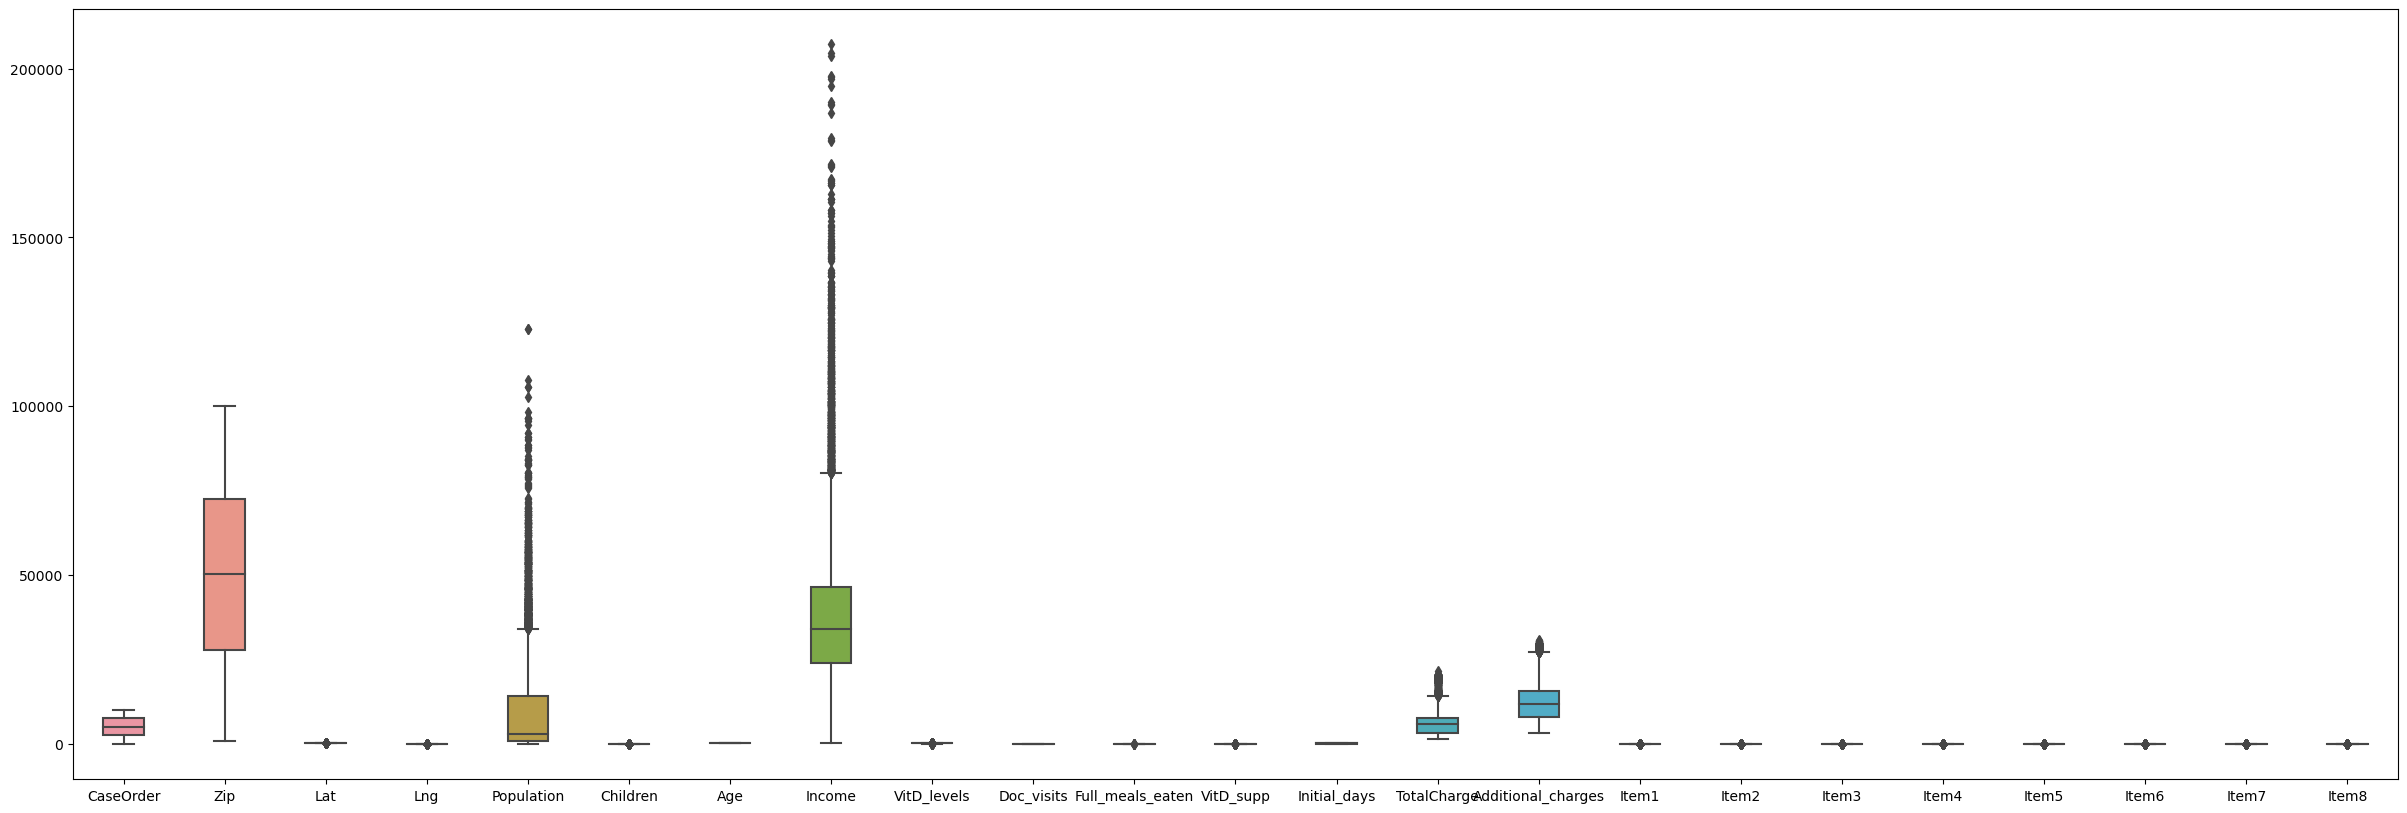

In [20]:
#use boxplot to find outliers in numerical data types
plt.subplots(figsize=(30,10))
boxplot=sns.boxplot(data=mdf_num_data, width=0.4)

In [21]:
#import scipy package for calculation of zscores
from pandas import DataFrame
import scipy.stats as stats

In [22]:
#calculate z-score for population
mdf['Population_z_score']=stats.zscore(mdf['Population'])
mdf[['Population', 'Population_z_score']].head()

,Population,Population_z_score
0,2951,-0.473168
1,11303,0.090242
2,17125,0.482983
3,2162,-0.526393
4,5287,-0.315586


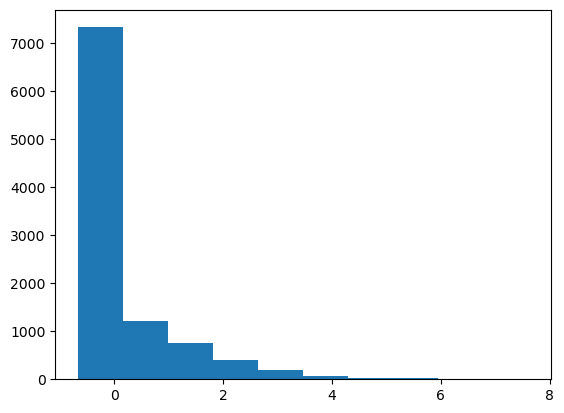

In [23]:
#examine z-sccore distribution for population
plt.hist(x='Population_z_score', data=mdf)
plt.show()

In [24]:
#get exact number of outliers for population
population_z_score=mdf.query('Population_z_score > 3')
population_z_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 153 to 9851
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           218 non-null    int64  
 1   Customer_id         218 non-null    object 
 2   Interaction         218 non-null    object 
 3   UID                 218 non-null    object 
 4   City                218 non-null    object 
 5   State               218 non-null    object 
 6   County              218 non-null    object 
 7   Zip                 218 non-null    int64  
 8   Lat                 218 non-null    float64
 9   Lng                 218 non-null    float64
 10  Population          218 non-null    int64  
 11  Area                218 non-null    object 
 12  Timezone            218 non-null    object 
 13  Job                 218 non-null    object 
 14  Children            218 non-null    float64
 15  Age                 218 non-null    float64
 16  Educa

In [25]:
#Calculate z-score for income
mdf['Income_z_score']=stats.zscore(mdf['Income'])
mdf[['Income', 'Income_z_score']].head()

,Income,Income_z_score
0,86575.93,1.904974
1,46805.99,0.316815
2,14370.14,-0.978466
3,39741.49,0.034704
4,1209.56,-1.504016


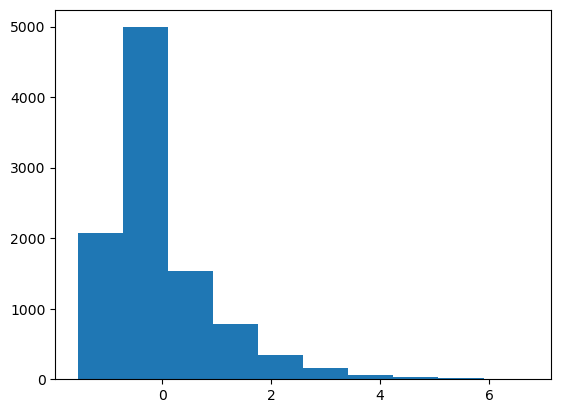

In [26]:
#examine z-score distribution for income
plt.hist(x='Income_z_score', data=mdf)
plt.show()

In [27]:
#get exact number of outliers for income
income_z_score=mdf.query('Income_z_score > 3')
income_z_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 30 to 9955
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           180 non-null    int64  
 1   Customer_id         180 non-null    object 
 2   Interaction         180 non-null    object 
 3   UID                 180 non-null    object 
 4   City                180 non-null    object 
 5   State               180 non-null    object 
 6   County              180 non-null    object 
 7   Zip                 180 non-null    int64  
 8   Lat                 180 non-null    float64
 9   Lng                 180 non-null    float64
 10  Population          180 non-null    int64  
 11  Area                180 non-null    object 
 12  Timezone            180 non-null    object 
 13  Job                 180 non-null    object 
 14  Children            180 non-null    float64
 15  Age                 180 non-null    float64
 16  Educat

In [28]:
#Calculate z-score for TotalCharge
mdf['TotalCharge_z_score']=stats.zscore(mdf['TotalCharge'])
mdf[['TotalCharge', 'TotalCharge_z_score']].head()

,TotalCharge,TotalCharge_z_score
0,3191.048774,-0.799579
1,4214.905346,-0.496429
2,2177.586768,-1.099652
3,2465.118965,-1.014517
4,1885.655137,-1.186089


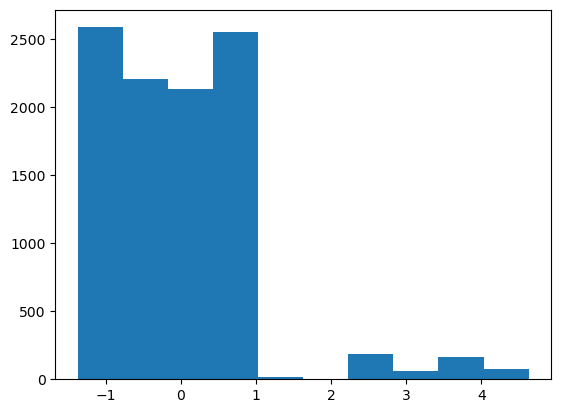

In [29]:
#examine z-score distribution for Total Charge
plt.hist(x='TotalCharge_z_score', data=mdf)
plt.show()

In [30]:
#Get total number of outliers for TotalCharge
totalcharge_z_score=mdf.query('TotalCharge_z_score > 3')
totalcharge_z_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 527 to 9973
Data columns (total 55 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CaseOrder            276 non-null    int64  
 1   Customer_id          276 non-null    object 
 2   Interaction          276 non-null    object 
 3   UID                  276 non-null    object 
 4   City                 276 non-null    object 
 5   State                276 non-null    object 
 6   County               276 non-null    object 
 7   Zip                  276 non-null    int64  
 8   Lat                  276 non-null    float64
 9   Lng                  276 non-null    float64
 10  Population           276 non-null    int64  
 11  Area                 276 non-null    object 
 12  Timezone             276 non-null    object 
 13  Job                  276 non-null    object 
 14  Children             276 non-null    float64
 15  Age                  276 non-null    

In [31]:
#get median value for population
med=mdf['Population'].quantile(0.5)
print(med)

2769.0


In [32]:
#calculate IQR and max value for population 
q1=mdf['Population'].quantile(0.25)
q3=mdf['Population'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+(iqr * 1.5)
print(upper_limit)

33820.375


In [33]:
#replace outliers with median value in population
mdf['Population']=np.where(mdf['Population'] > 33820.375, 2769.0, mdf['Population'])

In [34]:
#get median value for income
med=mdf['Income'].quantile(0.5)
print(med)

33942.28


In [35]:
#calculate IQR and max value for income 
q1=mdf['Income'].quantile(0.25)
q3=mdf['Income'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+(iqr * 1.5)
print(upper_limit)

80232.75


In [36]:
#replace outliers with median value in income
mdf['Income']=np.where(mdf['Income']>80232.75, 33942.28,mdf['Income'])

In [37]:
#get median value for totalcharge
med=mdf['TotalCharge'].quantile(0.5)
print(med)

5852.250564


In [38]:
#calculate IQR and max value for totalcharge 
q1=mdf['TotalCharge'].quantile(0.25)
q3=mdf['TotalCharge'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+(iqr * 1.5)
print(upper_limit)

14157.615055625001


In [39]:
#replace outliers with median value in totalcharge
mdf['TotalCharge']=np.where(mdf['TotalCharge']>14157.615055625001, 5852.250564,mdf['TotalCharge'])

In [40]:
#Define variables for PCA
mdf_pca=mdf[['Lat','Lng','Income','VitD_levels','Initial_days','TotalCharge','Additional_charges']]

In [41]:
#Normalize the PCA data
mdf_pca_normalized=(mdf_pca-mdf_pca.mean())/mdf_pca.std()

In [42]:
#Shape PCA analysis
pca=PCA(n_components=mdf_pca.shape[1])

In [43]:
#Fit PCA to normalized dataset
pca.fit(mdf_pca_normalized)

PCA(n_components=7)

In [45]:
#transform normalized data into new dataframe
mdf_pca2=pd.DataFrame(pca.transform(mdf_pca_normalized),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

In [46]:
#get PCA loadings matrix
loadings=pd.DataFrame(pca.components_.T,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'],index=mdf_pca.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Lat,-0.016695,0.706776,0.012080,0.016910,-0.000752,-0.706934,-0.000985
Lng,-0.013037,-0.706286,-0.043584,0.020791,-0.011975,-0.706053,-0.001832
Income,-0.000167,-0.020256,0.402686,-0.880788,0.245847,-0.034696,-0.000737
VitD_levels,0.098878,-0.027417,0.607801,0.455939,0.634171,-0.008990,-0.099580
Initial_days,0.699596,0.006851,-0.108898,-0.067431,-0.065978,-0.012100,-0.699723
TotalCharge,0.707020,0.001337,0.001824,0.000335,-0.001383,-0.016306,0.707001
Additional_charges,0.021503,-0.020403,0.674177,0.105194,-0.729992,-0.006059,-0.024823


In [47]:
#calculate covariants for PCA
cov_matrix=np.dot(mdf_pca_normalized.T,mdf_pca_normalized)/mdf_pca.shape[0]

In [48]:
#create eigenvalue vectors 
eigenvalues=[np.dot(eigenvector.T,np.dot(cov_matrix,eigenvector)) for eigenvector in pca.components_]

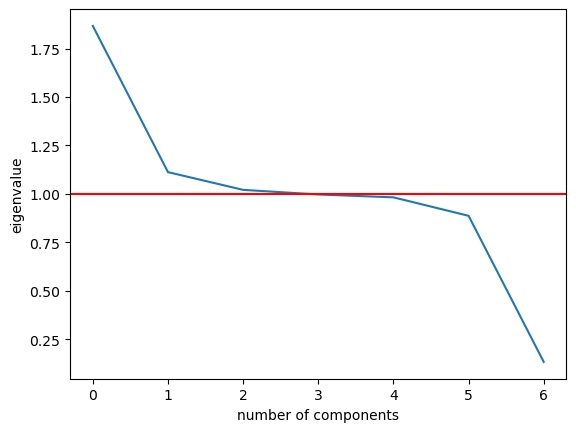

In [49]:
#plot eigenvalues on scree plot
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.axhline(y=1, color="red")
plt.show()

In [51]:
#extract cleaned data
mdf.to_csv(r'/Users/robertpatton/Documents/medical_clean_data.csv')